In [1]:
# Importing libraries for knn and logistic regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import seaborn as sns

In [2]:
# Reading the dataset(csv file)
df = pd.read_csv('..\datasets\iris.csv')
df.head()

,sepallength,sepalwidth,petallength,petalwidth,Flowers
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Splitting the data into training and testing sets

In [3]:
# Splitting the dataset into train and test with 2/3 train and 1/3 test
train, test = train_test_split(df, test_size=0.33, random_state=42)
# train.head()
# test.head()

## KNN

In [4]:
# Creating a KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
# Fitting the model with train data
knn.fit(train.iloc[:, 0:4], train.iloc[:, 4])

# Predicting the test data
pred = knn.predict(test.iloc[:, 0:4])

# Calculating the accuracy score
accuracy = accuracy_score(test.iloc[:, 4], pred)
print('Accuracy of KNN: ', accuracy)

# Calculating the confusion matrix
conf_matrix = confusion_matrix(test.iloc[:, 4], pred)
print('Confusion matrix of KNN: \n', conf_matrix)


Accuracy of KNN:  0.98
Confusion matrix of KNN: 
 [[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


<Axes: >

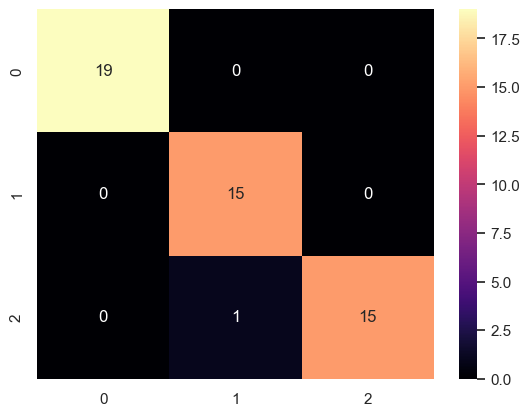

In [5]:
# Setting seaborn style
sns.set(style="whitegrid")
# Plotting the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='magma')

In [6]:
# list of indices of misclassified
misclassified = []
for i in range(len(test)):
    if test.iloc[i, 4] != pred[i]:
        misclassified.append(i)
print('Misclassified indices: ', misclassified)

Misclassified indices:  [46]


## Logistic Regression

In [7]:
# Creating a Logistic Regression classifier
log_reg = LogisticRegression()
# Fitting the model with train data
log_reg.fit(train.iloc[:, 0:4], train.iloc[:, 4])

# Predicting the test data
pred = log_reg.predict(test.iloc[:, 0:4])

# Calculating the accuracy score
accuracy = accuracy_score(test.iloc[:, 4], pred)
print('Accuracy of Logistic Regression: ', accuracy)

# Calculating the confusion matrix
conf_matrix = confusion_matrix(test.iloc[:, 4], pred)
print('Confusion matrix of Logistic Regression: \n', conf_matrix)

Accuracy of Logistic Regression:  1.0
Confusion matrix of Logistic Regression: 
 [[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]


<Axes: >

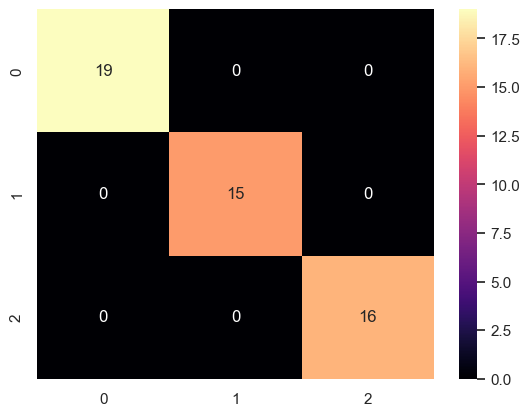

In [8]:
# Heatmap of confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='magma')

In [9]:
# No misclassified indices